In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/ThesisDataset/Output_1.csv')
gc.collect()
df0

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
29995,3310475,male,16,Biotech,Gemini,"14,June,2004",yea after a perpetualy borring 2 exa...
29996,3310475,male,16,Biotech,Gemini,"13,June,2004",today not held verry much for me ha...
29997,3310475,male,16,Biotech,Gemini,"12,June,2004",hello again everyone sorry about miss...
29998,3310475,male,16,Biotech,Gemini,"10,June,2004",a tiring day after both English and ...


In [ ]:
df0 = df0.dropna()
df0 = df0.drop_duplicates(subset='text', keep="first")
gc.collect()
df0

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
29995,3310475,male,16,Biotech,Gemini,"14,June,2004",yea after a perpetualy borring 2 exa...
29996,3310475,male,16,Biotech,Gemini,"13,June,2004",today not held verry much for me ha...
29997,3310475,male,16,Biotech,Gemini,"12,June,2004",hello again everyone sorry about miss...
29998,3310475,male,16,Biotech,Gemini,"10,June,2004",a tiring day after both English and ...


In [ ]:
df1 = df0.query('age>0 and age < 18')
df2 = df0.query('age >= 18 and age<=100')
#del df0
gc.collect()
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8750 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8750 non-null   int64 
 1   gender  8750 non-null   object
 2   age     8750 non-null   int64 
 3   topic   8750 non-null   object
 4   sign    8750 non-null   object
 5   date    8750 non-null   object
 6   text    8750 non-null   object
dtypes: int64(2), object(5)
memory usage: 546.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20929 entries, 4 to 29863
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20929 non-null  int64 
 1   gender  20929 non-null  object
 2   age     20929 non-null  int64 
 3   topic   20929 non-null  object
 4   sign    20929 non-null  object
 5   date    20929 non-null  object
 6   text    20929 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
df1 = df1.sample(n=  8750,replace=False)
df2 = df2.sample(n=  8750,replace=False)
frames = [df1, df2]
dataset = pd.concat(frames,ignore_index=True)
dataset
gc.collect()

129

In [ ]:
dataset = dataset.drop(['id'], axis = 1)
dataset = dataset.drop(['gender'], axis = 1)
dataset = dataset.drop(['sign'], axis = 1)
dataset = dataset.drop(['topic'], axis = 1)
dataset = dataset.drop(['date'], axis = 1)
gc.collect()

88

In [ ]:
def binningFunction(col, cut_points, labels=None):
     minval = col.min()
     maxval = col.max()
     break_points = [minval] + cut_points + [maxval]
     print(break_points)
     if not labels:
         labels = range(len(cut_points)+1)
     colBin = pd.cut(col, bins = break_points, labels = labels, include_lowest = True)
     return colBin

cut_points = [18];
labels = ["UnderAged","Aged"]
dataset["Age_divide"] = binningFunction(dataset["age"], cut_points, labels)    

[13, 18, 48]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(dataset["Age_divide"])
dataset['encoded_category'] = le.transform(dataset["Age_divide"])

dataset

,age,text,Age_divide,encoded_category
0,14,Brittany~ Bring 13 going on 30!! I rea...,UnderAged,1
1,17,"Had a nightmare last night. No, no...",UnderAged,1
2,17,"Well, the way I figure it, I'm probably...",UnderAged,1
3,17,Ahh I feel I must write some usele...,UnderAged,1
4,17,"Same Spiral, Different Day An...",UnderAged,1
...,...,...,...,...
17495,26,"Not necessarily, but I think it is....",Aged,0
17496,23,"haa,..no prob for me,..=P haa ya ...",Aged,0
17497,24,It has been an eventful couple of weeks...,Aged,0
17498,24,It's a free and clear Saturday night an...,Aged,0


In [ ]:
dataset.text.value_counts().plot.bar(color=['lightgreen', 'pink'])

In [ ]:
dataset
gc.collect()

36576

In [ ]:
ind = dataset.index[dataset['text'].apply(lambda x: len(str(x).split())) <50 ]

In [ ]:
dataset.loc[12389]

age                                                                27
text                           I have been and returned from Gorok...
Age_divide                                                       Aged
encoded_category                                                    0
Name: 12389, dtype: object

In [ ]:
ind

Int64Index([   10,    11,    14,    15,    19,    24,    25,    26,    31,
               33,
            ...
            17458, 17461, 17464, 17478, 17479, 17480, 17482, 17486, 17492,
            17496],
           dtype='int64', length=5024)

In [ ]:
article_len = dataset['text'].astype(str).apply(len)
word_count = dataset['text'].apply(lambda x: len(str(x).split()))

In [ ]:
dataset = dataset.dropna(subset=['text'])

In [ ]:
dataset.loc[758].text

'       Time for a light hearted post. The past few have been pretty damn depressing so I figured I change the tone of this blog. Plus the fact that I’m in a good mood sure helps.  Just spoke to my father and after consultation with my mother, we came to a deal for my future car. Oh sure, I realise that I’m only 16 and I can’t drive by myself till I hit 18 [which happens to be in a year and half time but oh well].   If all goes well [and by that, no fucking around, good behaviour on my part not to mention a kick ass VCE score], I’ll end up driving a spanking new Lexus IS200. Or IS300 if I’m lucky. Extra lucky, but hey, an IS200 would suit my needs just fine.   Of course, this sparks dreams of what I’m going to do with the car and I think the first thing I’d probably do [apart from putting in a new CD/MP3 player unit plus new speakers] would be to get a personalised license plate. Research shows that it’d cost me around 300 dollars. Which… is a substantial amount of money for a metal pl

In [ ]:
dataset.query('text == ""')

,age,text,Age_divide,encoded_category


In [ ]:
article_len

0         419
1        1189
2         890
3         954
4        3248
         ... 
17495    1009
17496     273
17497    2048
17498    1430
17499    2894
Name: text, Length: 17500, dtype: int64

In [ ]:
word_count

0         79
1        216
2        179
3        169
4        610
        ... 
17495    165
17496     39
17497    406
17498    259
17499    537
Name: text, Length: 17500, dtype: int64

In [ ]:
min(article_len)

4

In [ ]:
max(article_len)

68545

In [ ]:
min(word_count)

0

In [ ]:
max(word_count)

11502

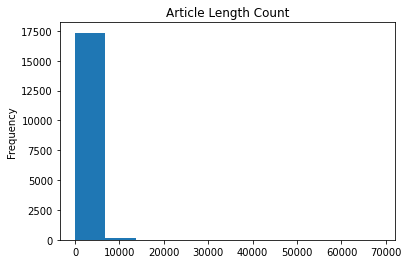

In [ ]:
article_len.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

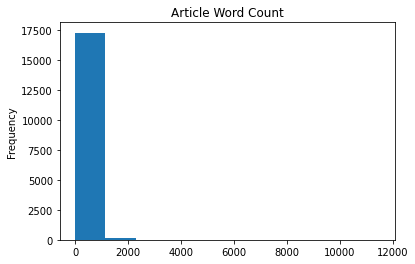

In [ ]:
word_count.plot(
    kind = 'hist',
    xlabel = 'word_count',
    ylabel = 'count',
    title='Article Word Count')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for i in range(0, 17500):
 text = re.sub('[^a-zA-Z]',' ',dataset['text'][i])
 text = text.lower()
 text = text.split()
 ps = PorterStemmer()
 text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
 text = ' '.join(text)
 corpus.append(text)

In [ ]:
corpus

['brittani bring go realli wanna see im sure lot ppl also address seidel prolli outsid somethin ok guy come mom say guy eat lunch come make sure everyon get messag hope come becca ahh child need call carissa cant wait see hair love rach',
 'nightmar last night watch ring went bed way least materi still understand certainli feel guilti practic much violin week speak ring anyon actual like person find scari mayb understand first place probabl asian japanes version much scarier mayb watch japanes version young bother watch ring grown plu know plot shit mayb hbo cut disgust scene dream noth practic horror stori actual normal stori main charact apart tea talk charact even anyth observ bug much know dream bother much alway affect real life think dream day alreadi',
 'well way figur probabl go die tomorrow ohh well live long tori parent know feel tori know feel parent know feel brother sure hell know feel figur least hope talk tomorrow go tri talk mari today drop letter wrote guess good thing

In [ ]:
len(corpus)

17500

In [ ]:
dataset['text'] = corpus

In [ ]:
dataset

,age,text,Age_divide,encoded_category
0,14,brittani bring go realli wanna see im sure lot...,UnderAged,1
1,17,nightmar last night watch ring went bed way le...,UnderAged,1
2,17,well way figur probabl go die tomorrow ohh wel...,UnderAged,1
3,17,ahh feel must write useless crap one realli gi...,UnderAged,1
4,17,spiral differ day say spiral mean spiral thoug...,UnderAged,1
...,...,...,...,...
17495,26,necessarili think tour de franc lanc armstrong...,Aged,0
17496,23,haa prob p haa ya dun mind go dive wif hehee s...,Aged,0
17497,24,event coupl week coupl first sinc post last na...,Aged,0
17498,24,free clear saturday night hide self impos exil...,Aged,0


In [ ]:
from collections import Counter
def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

In [ ]:
text = dataset.text
counter = counter_word(text)

In [ ]:
len(counter)

55987

In [ ]:
counter

Counter({'brittani': 94,
         'bring': 1040,
         'go': 14832,
         'realli': 9864,
         'wanna': 1036,
         'see': 7001,
         'im': 2557,
         'sure': 2464,
         'lot': 3172,
         'ppl': 579,
         'also': 3756,
         'address': 285,
         'seidel': 1,
         'prolli': 105,
         'outsid': 737,
         'somethin': 65,
         'ok': 1836,
         'guy': 3711,
         'come': 5027,
         'mom': 1553,
         'say': 7085,
         'eat': 1484,
         'lunch': 738,
         'make': 6937,
         'everyon': 2239,
         'get': 13202,
         'messag': 464,
         'hope': 3011,
         'becca': 61,
         'ahh': 109,
         'child': 449,
         'need': 4450,
         'call': 3899,
         'carissa': 30,
         'cant': 710,
         'wait': 2049,
         'hair': 911,
         'love': 7273,
         'rach': 39,
         'nightmar': 95,
         'last': 4648,
         'night': 4124,
         'watch': 3007,
         'r

In [ ]:
num_words = len(counter)
max_length = 20

In [ ]:
X =  dataset.iloc[:, 1].values
y = dataset.iloc[:, 3].values
gc.collect()

247

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.10, random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

{'like': 1,
 'nbsp': 2,
 'go': 3,
 'get': 4,
 'one': 5,
 'know': 6,
 'time': 7,
 'think': 8,
 'realli': 9,
 'day': 10,
 'thing': 11,
 'well': 12,
 'want': 13,
 'urllink': 14,
 'would': 15,
 'peopl': 16,
 'good': 17,
 'got': 18,
 'love': 19,
 'say': 20,
 'see': 21,
 'make': 22,
 'back': 23,
 'feel': 24,
 'much': 25,
 'work': 26,
 'look': 27,
 'even': 28,
 'went': 29,
 'way': 30,
 'today': 31,
 'life': 32,
 'come': 33,
 'could': 34,
 'someth': 35,
 'friend': 36,
 'still': 37,
 'last': 38,
 'take': 39,
 'year': 40,
 'need': 41,
 'right': 42,
 'talk': 43,
 'first': 44,
 'night': 45,
 'tri': 46,
 'start': 47,
 'new': 48,
 'never': 49,
 'littl': 50,
 'us': 51,
 'call': 52,
 'also': 53,
 'play': 54,
 'said': 55,
 'guy': 56,
 'around': 57,
 'home': 58,
 'read': 59,
 'use': 60,
 'thought': 61,
 'oh': 62,
 'u': 63,
 'school': 64,
 'week': 65,
 'two': 66,
 'mean': 67,
 'let': 68,
 'tell': 69,
 'lot': 70,
 'end': 71,
 'live': 72,
 'person': 73,
 'ever': 74,
 'watch': 75,
 'alway': 76,
 'blog': 77,

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    X_train_seq, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
train_padded[0]

array([ 1596,   386,  1244,    59, 15224,   205,   195,   172,  1263,
         439,   104,  1076, 13678,    35,  2750,   319,   303,   104,
          16,    37], dtype=int32)

In [ ]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    X_test_seq, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
print(len(X_train[2]))
print(len(X_train_seq[2]))

45
7


In [ ]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (15750, 20)
Shape of test (1750, 20)


In [ ]:
kids = 0
ad = 0
for x in y_train:
  if x == 0:
    kids = kids+1
  else:
    ad = ad+1 

In [ ]:
kids

7876

In [ ]:
ad

7874

In [ ]:
kids2 = 0
ad2 = 0
for x in y_test:
  if x == 0:
    kids2 = kids2+1
  else:
    ad2 = ad2+1 

In [ ]:
kids2

874

In [ ]:
ad2

876

In [ ]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 16, input_length=max_length,\
                                    embeddings_regularizer = regularizers.l2(0.005)))
model.add(LSTM(16,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))
model.add(Flatten())
model.add(Dense(64, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 5, 
                                        restore_best_weights = True)

In [ ]:
history = model.fit(
    train_padded, y_train, epochs=11, validation_data=(test_padded, y_test),callbacks = [earlystopping]
)

Epoch 1/11
493/493 [==============================] - 10s 20ms/step - loss: 0.5341 - accuracy: 0.8304 - val_loss: 0.6398 - val_accuracy: 0.7400
Epoch 2/11
493/493 [==============================] - 10s 20ms/step - loss: 0.5125 - accuracy: 0.8421 - val_loss: 0.6561 - val_accuracy: 0.7417
Epoch 3/11
493/493 [==============================] - 10s 20ms/step - loss: 0.5002 - accuracy: 0.8533 - val_loss: 0.6675 - val_accuracy: 0.7280
Epoch 4/11
493/493 [==============================] - 10s 20ms/step - loss: 0.4908 - accuracy: 0.8537 - val_loss: 0.6824 - val_accuracy: 0.7337
Epoch 5/11
493/493 [==============================] - 10s 20ms/step - loss: 0.4878 - accuracy: 0.8606 - val_loss: 0.6785 - val_accuracy: 0.7274
Epoch 6/11
493/493 [==============================] - 10s 20ms/step - loss: 0.4789 - accuracy: 0.8617 - val_loss: 0.6758 - val_accuracy: 0.7349


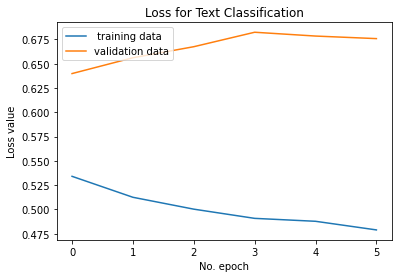

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

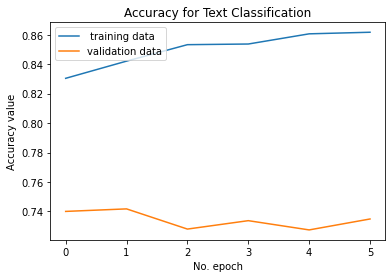

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            895792    
                                                                 
 lstm_1 (LSTM)               (None, 20, 16)            2112      
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                20544     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dropout_3 (Dropout)         (None, 8)                

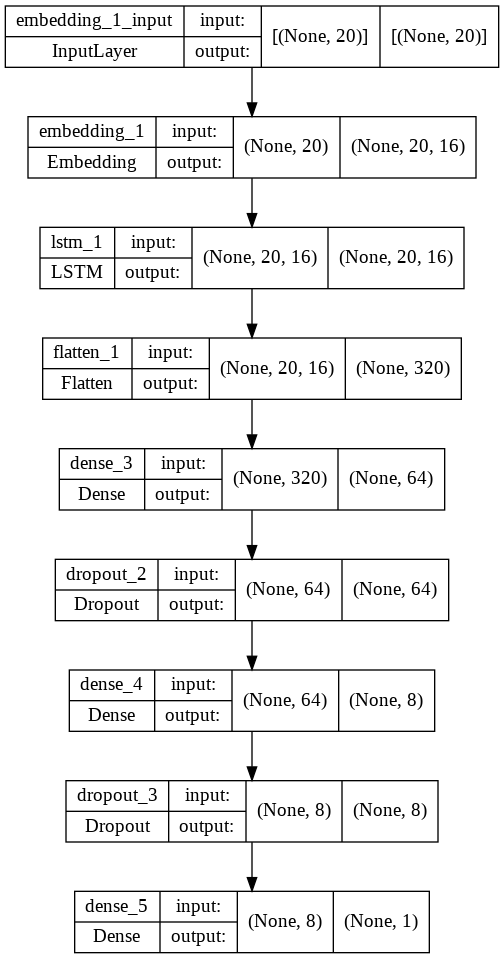

In [ ]:
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
results = model.evaluate(test_padded,y_test)

55/55 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.7400


In [ ]:
p_pred = model.predict(test_padded)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0.62 0.99 0.82 ... 0.41 0.41 0.14]
[1 1 1 ... 0 0 0]


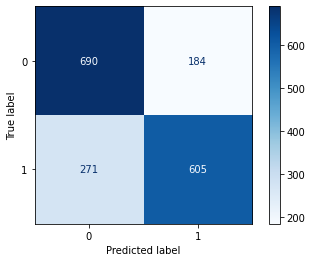

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       874
           1       0.77      0.69      0.73       876

    accuracy                           0.74      1750
   macro avg       0.74      0.74      0.74      1750
weighted avg       0.74      0.74      0.74      1750

